In [34]:
import tensorflow as tf

In [35]:
# connect to google drive
from google.colab import drive
drive.mount('/content/myDrive/')

Drive already mounted at /content/myDrive/; to attempt to forcibly remount, call drive.mount("/content/myDrive/", force_remount=True).


In [36]:
# go to directory where the data and models are
%cd myDrive/MyDrive

[Errno 2] No such file or directory: 'myDrive/MyDrive'
/content/myDrive/MyDrive


In [37]:
# read the data

from utils import data_loader
import importlib
# get the newest version of data_loader
importlib.reload(data_loader)
data = data_loader.DataLoader()

# load the data
X_train, y_train, X_test, X_valid, y_valid = data.X_train, data.y_train, data.X_test, data.X_valid, data.y_valid

In [38]:
unet = tf.keras.models.load_model('./2final_unet_model') # import best performing basic U-Net
vgg_unet = tf.keras.models.load_model('./2final_vgg_unet_model') # import VGG-16 encoder U-Net model

# Visualizing result - basic U-Net

In [39]:
# get model predictions
predictions = unet.predict(X_test)

32/32 [==============================] - 493s 15s/step


In [40]:
import numpy as np

In [41]:
np.count_nonzero(predictions[0] < 0.01)

7876

In [42]:
import matplotlib.pyplot as plt
import random

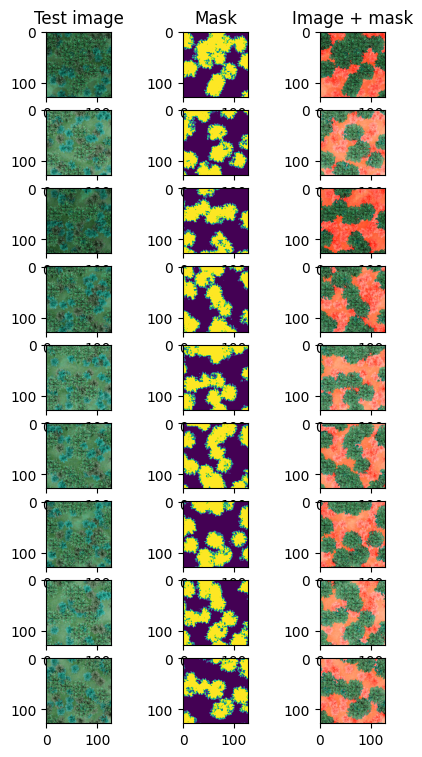

In [43]:
fig = plt.figure(figsize=(5, 10))
columns = 3
rows = 10

# plot random 10 images from test dataset
count = 1
for i in range(1, 10):

    # get random index
    id = random.randint(0, len(X_test)-1)

    # plot image
    img = X_test[id]
    fig.add_subplot(rows, columns, count)
    if count == 1:
      plt.title("Test image")
    plt.imshow(img)

    # plot mask
    mask = predictions[id]
    fig.add_subplot(rows, columns, count+1)
    if count == 1:
      plt.title("Mask")
    plt.imshow(mask)

    # plot together
    combined = img
    combined[np.where(mask <= 0.01)] = 1
    fig.add_subplot(rows, columns, count+2)
    if count == 1:
      plt.title("Image + mask")
    plt.imshow(combined)

    count = count + 3
plt.show()

# Visualizing result - VGG-16 encoder U-Net

In [44]:
predictions = vgg_unet.predict(X_test)

32/32 [==============================] - 484s 15s/step


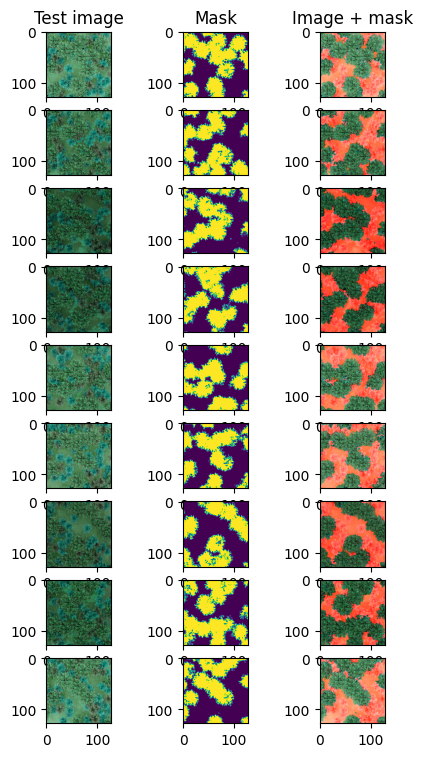

In [45]:
fig = plt.figure(figsize=(5, 10))
columns = 3
rows = 10

# plot random 10 images from test dataset
count = 1
for i in range(1, 10):

    # get random index
    id = random.randint(0, len(X_test)-1)

    # plot image
    img = X_test[id]
    fig.add_subplot(rows, columns, count)
    if count == 1:
      plt.title("Test image")
    plt.imshow(img)

    # plot mask
    mask = predictions[id]
    fig.add_subplot(rows, columns, count+1)
    if count == 1:
      plt.title("Mask")
    plt.imshow(mask)

    # plot together
    combined = img
    combined[np.where(mask <= 0.01)] = 1
    fig.add_subplot(rows, columns, count+2)
    if count == 1:
      plt.title("Image + mask")
    plt.imshow(combined)

    count = count + 3
plt.show()